#### Implement Voting Classifier on Synthetic Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import path_setup
from sklearn.datasets import make_blobs, make_regression
from sklearn.preprocessing import StandardScaler
from Decisiontree import ClassificationTree, RegressionTree
from Ensemble_Learning import VotingClassifier, VotingRegressor
from ensemble_utils import *
from K_Nearest_Neighbors import KNNClassifier, KNNRegressor
from Logistic_Regression import LogisticRegression


##### 1. Implement Voting Classifier on manually generated two-class data

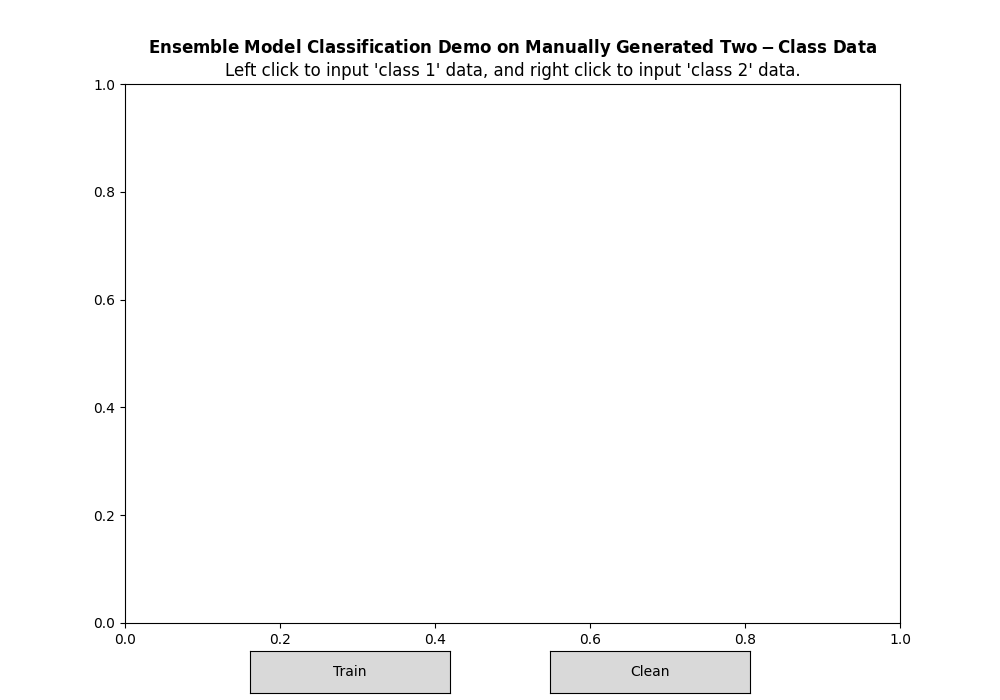

Training finished after 36 iterations.
Theta values:[-0.00428944  2.43303715 -0.25451975]


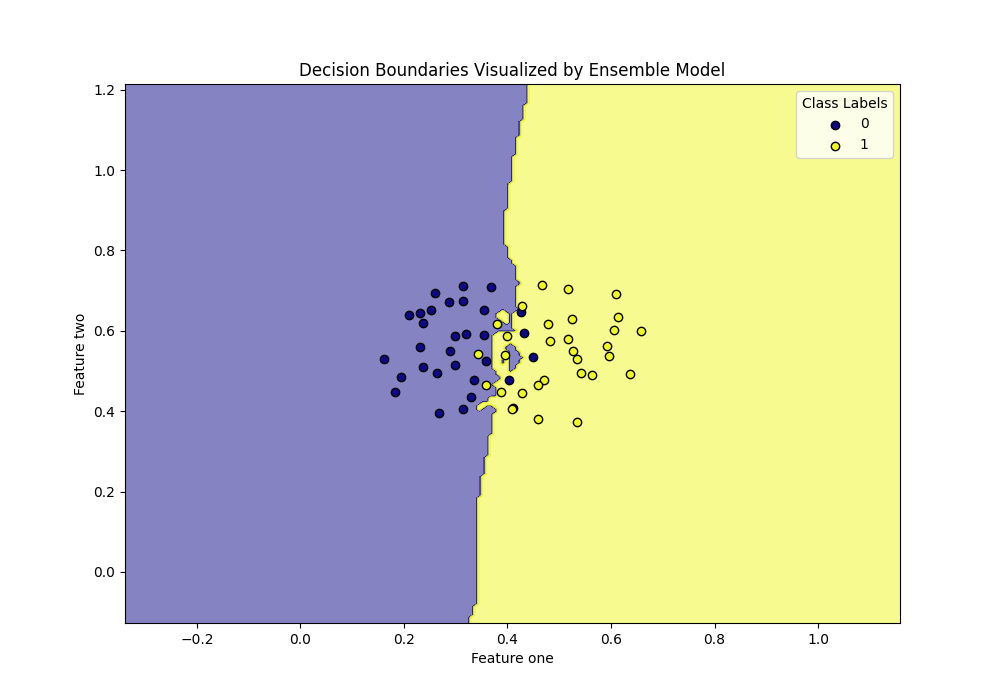

In [8]:
%matplotlib widget
interactive_data_collection_classification('voting')

##### 2. Implement Voting Classifier on non-linearly separable two-class data

Training finished after 10 iterations.
Theta values:[-3.96191560e-04  2.94936974e-01 -8.94227553e-01]


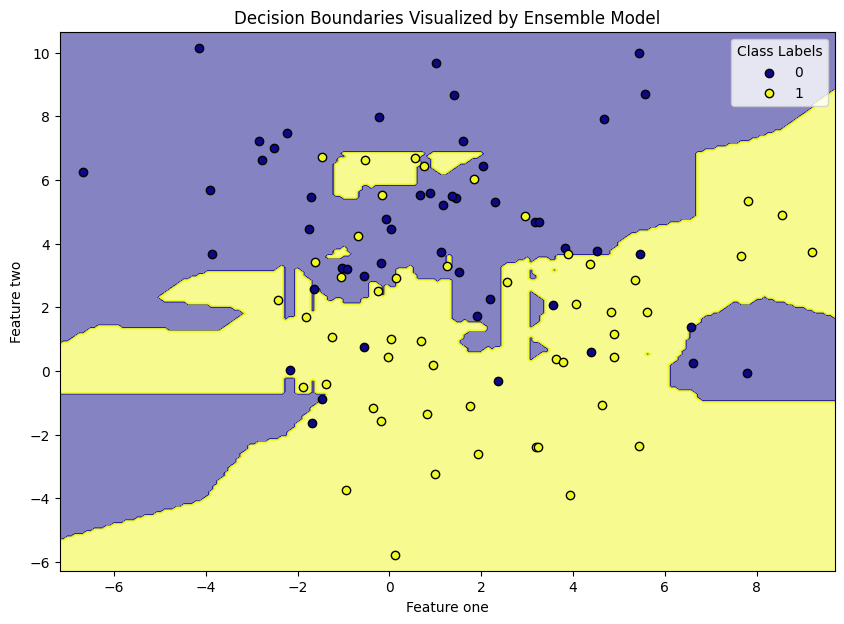

In [2]:
# Create training set
X,y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=3, random_state=0)

# Create base classifiers.
tree = ClassificationTree()
log_reg = LogisticRegression()
knn = KNNClassifier()

# Create ensemble model.
vec = VotingClassifier(classifiers=[tree, log_reg, knn], voting='hard')
vec.fit(X,y)

# Plot decision boundaries and class labels
create_contour_plot(vec, X, y, resolution=200)

#### Implement Voting Classifier on Predicting Marketing Target

In [3]:
# Load Data
market_data = pd.read_csv('../dataset/Social_Network_Ads.csv', header=0)

# Remove the First Column
market_data = market_data.drop(market_data.columns[0], axis=1)

# Training Set
train_X = market_data.iloc[0:300, 0:-1].values
train_Y = market_data.iloc[0:300:, -1].values

# Test Set
test_X = market_data.iloc[300:, 0:-1].values
test_Y = market_data.iloc[300:, -1].values

# Standardize the Features for Both Training Set and Test Set
scaler = StandardScaler()

train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

Training finished after 10 iterations.
Theta values:[-1.53394225  1.60743641  1.16641342]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        38
           1       0.98      0.84      0.90        62

    accuracy                           0.89       100
   macro avg       0.88      0.91      0.89       100
weighted avg       0.91      0.89      0.89       100



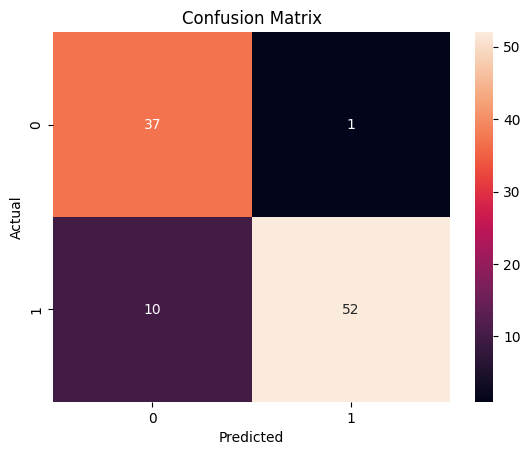

Decision Boundary with Training Data


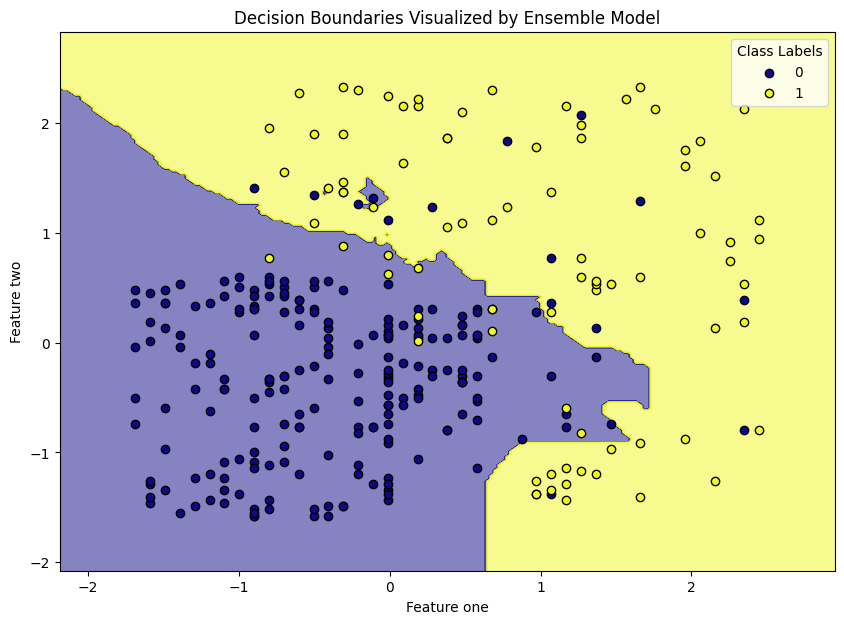

Decision Boundary with Testing Data


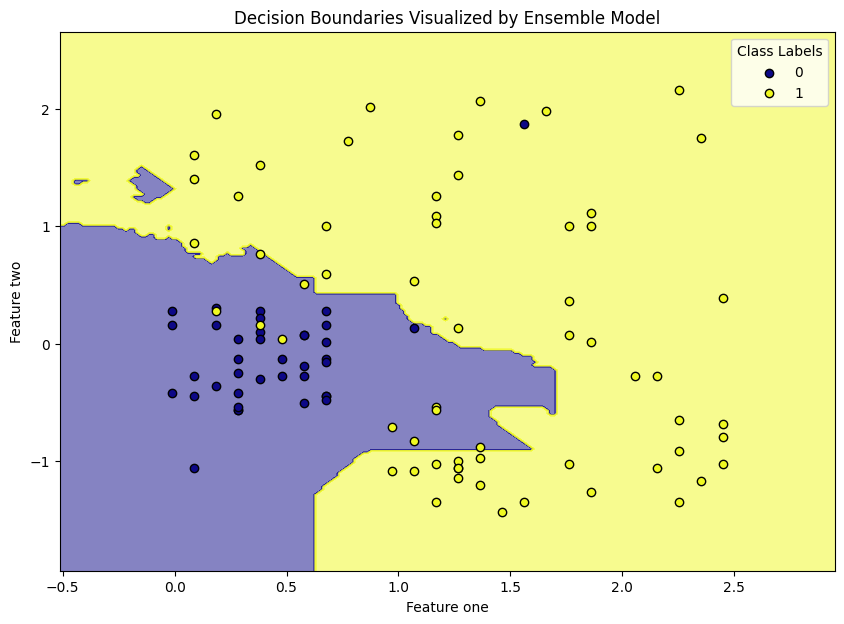

In [4]:
# Create base classifiers.
tree = ClassificationTree(criterion='gini', min_split_samples=8, min_leaf_samples=4)
log_reg = LogisticRegression(algorithm='BGD')
knn = KNNClassifier(k_neighbours=12)

# Create ensemble model.
vec = VotingClassifier(classifiers=[tree, log_reg, knn], voting='hard')
vec.fit(train_X,train_Y)

# Evaluate model performance on training data
pred_Y = vec.predict_class(test_X)
evaluate_model(test_Y, pred_Y, 'classification')

# Plot the decision boundary and the true labels
print('Decision Boundary with Training Data')
create_contour_plot(vec, train_X, train_Y, resolution=200)

# Plot the decision boundary and the true labels
print('Decision Boundary with Testing Data')
create_contour_plot(vec, test_X, test_Y, resolution=200)

#### Implement Voting Regressor on Synthetic Data


##### 1. Implement Voting Regressor on manually generated two-class data

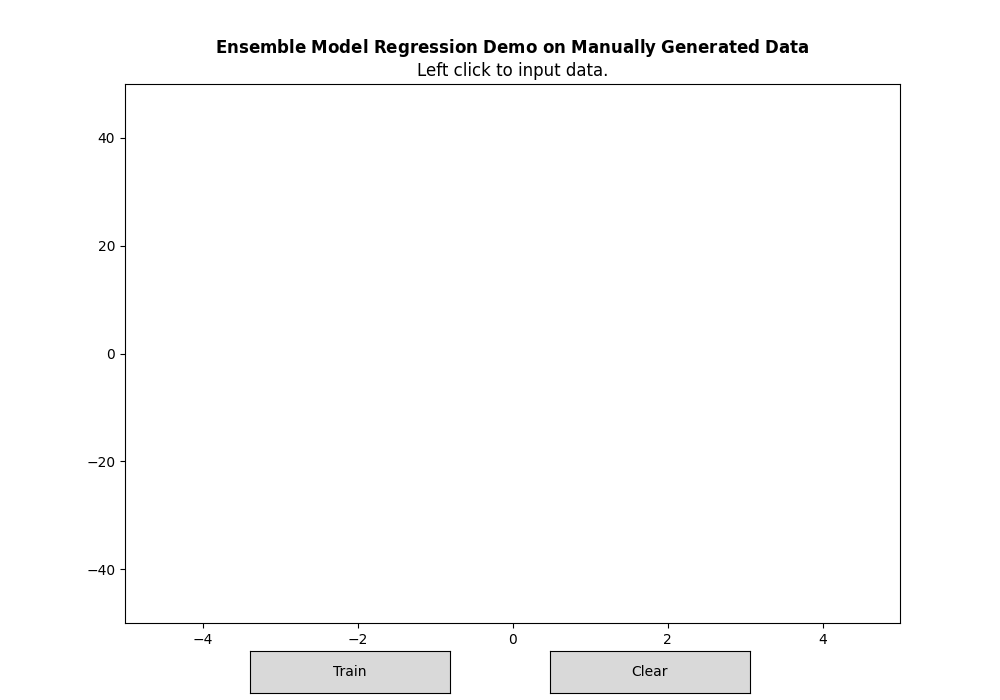

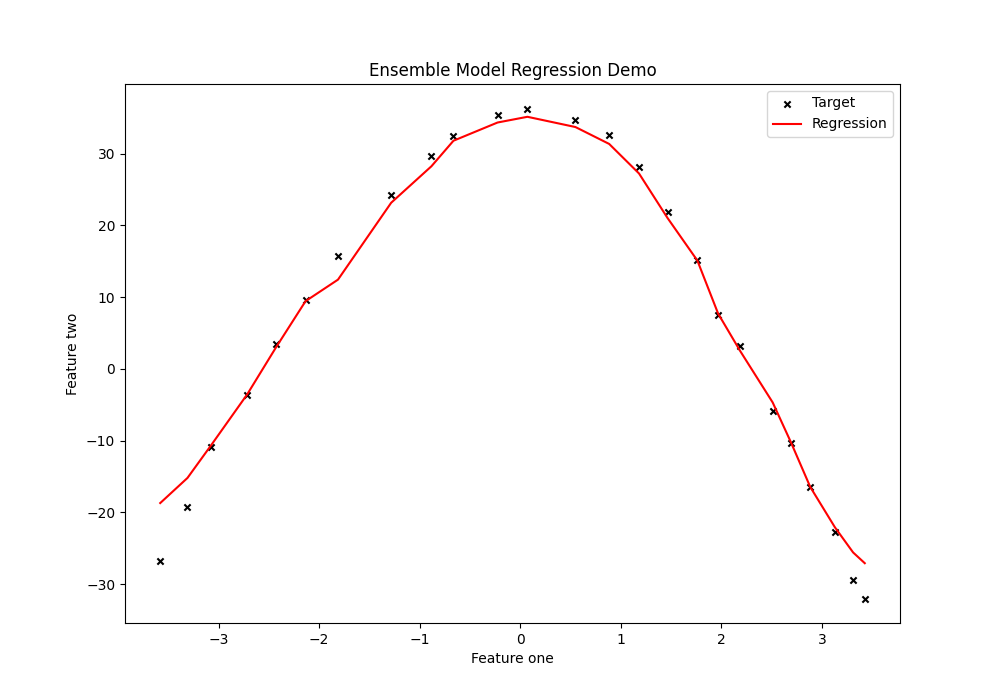

In [2]:
%matplotlib widget
interactive_data_collection_regression('voting')

##### 2. Implement Voting Regressor on linear data

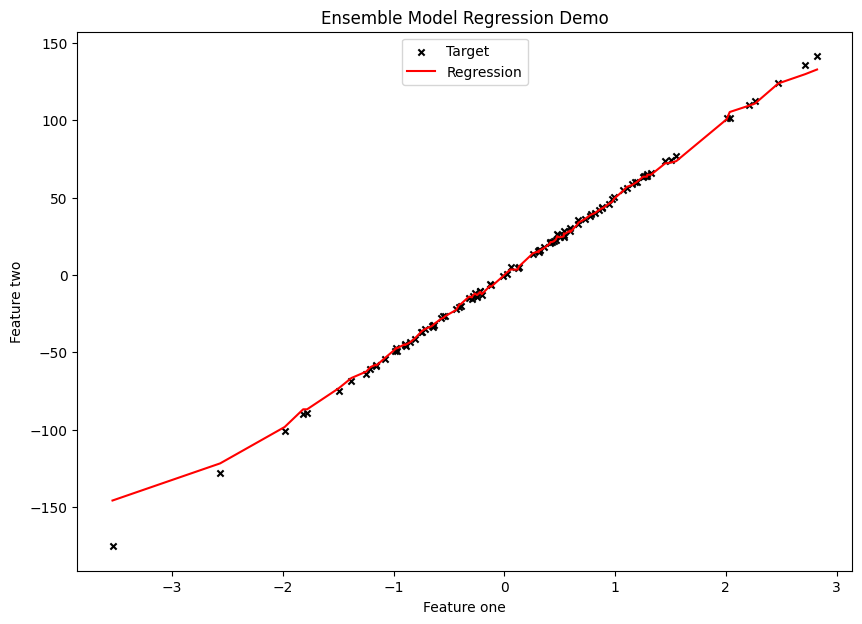

In [5]:
X, y = make_regression(n_samples=100, n_features=1, noise=1)

# Create base regressors.
tree = RegressionTree()
knn = KNNRegressor()

# Create ensemble model.
vec = VotingRegressor(regressors=[tree, knn])
vec.fit(X,y)

# Plot regression and target points
create_regression_plot(vec, X, y)

##### 3. Implement Voting Regressor on nonlinear data

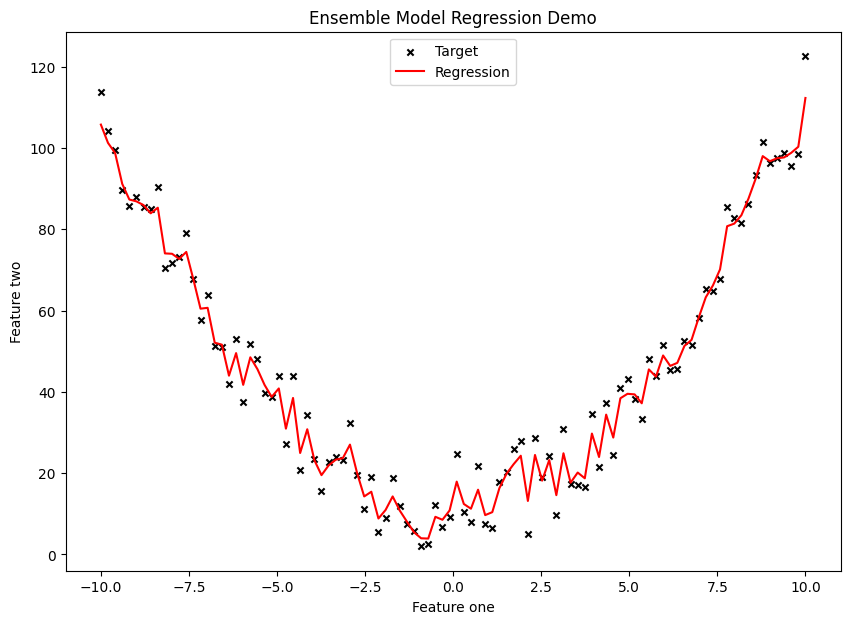

In [6]:
# Create the training set.
X = np.linspace(-10, 10, 100).reshape(-1,1)
y = np.array([x**2 + np.random.rand() * 25 for x in X])

# Create base regressors.
tree = RegressionTree()
knn = KNNRegressor()

# Create ensemble model.
vec = VotingRegressor(regressors=[tree, knn])
vec.fit(X,y)

# Plot regression and target points
create_regression_plot(vec, X, y)

#### Implement Voting Regressor on Predicting House Price

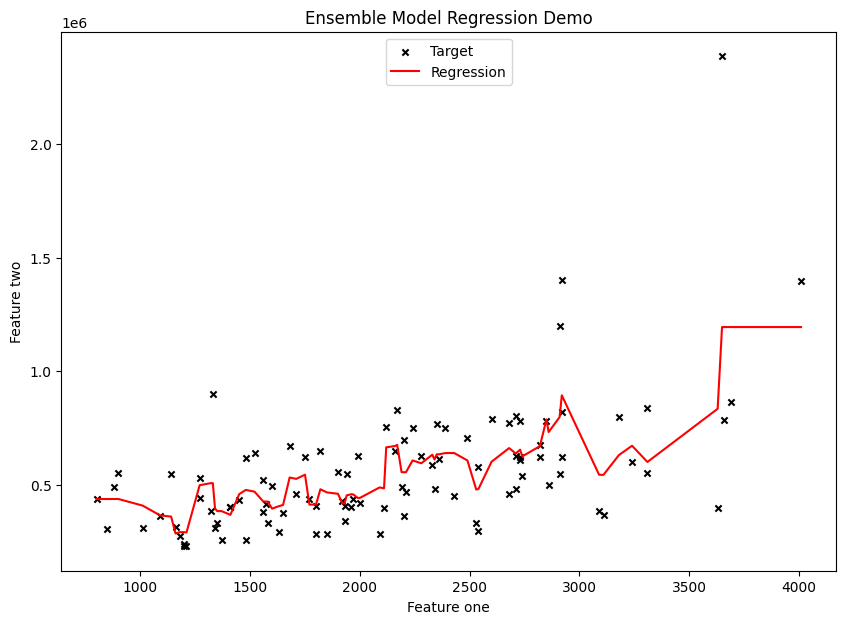

R-squared score (R²):  0.41297483111055266


In [7]:
# Load Data
house_data = pd.read_csv('../dataset/house_price.csv')

# Select first 100 training and next 50 testing data
train_X = np.array(house_data['sqft_living'].head(100)).reshape(-1, 1)
train_Y = np.array(house_data['price'].head(100))
test_X = np.array(house_data['sqft_living'].iloc[100:150]).reshape(-1, 1)
test_Y = np.array(house_data['price'].iloc[100:150])

# Create base regressors.
tree = RegressionTree(criterion='mse', min_split_samples=6, min_leaf_samples=1)
knn = KNNRegressor(k_neighbours=7)

# Create ensemble model.
vec = VotingRegressor(regressors=[tree, knn])
vec.fit(train_X, train_Y)

# Plot regression and target points
create_regression_plot(vec, train_X, train_Y)

# Evaluate model performance on testing data
pred_Y = tree.predict_value(test_X)
evaluate_model(test_Y, pred_Y, 'regression')